Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model withthe optimum number of clusters.

In [2]:
import numpy as np                             
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Read the dataset to the python environment.

In [3]:
data = pd.read_csv(r'C:\Users\Home\Downloads\Wine.csv')

In [4]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
data.head( )

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data.shape

(178, 13)

In [7]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
data.isna( ).sum( )

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [9]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [10]:
data.describe( )

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
X=data.iloc[:,[3,9]].values
X

array([[15.6     ,  5.64    ],
       [11.2     ,  4.38    ],
       [18.6     ,  5.68    ],
       [16.8     ,  7.8     ],
       [21.      ,  4.32    ],
       [15.2     ,  6.75    ],
       [14.6     ,  5.25    ],
       [17.6     ,  5.05    ],
       [14.      ,  5.2     ],
       [16.      ,  7.22    ],
       [18.      ,  5.75    ],
       [16.8     ,  5.      ],
       [16.      ,  5.6     ],
       [11.4     ,  5.4     ],
       [12.      ,  7.5     ],
       [17.2     ,  7.3     ],
       [20.      ,  6.2     ],
       [20.      ,  6.6     ],
       [16.5     ,  8.7     ],
       [15.2     ,  5.1     ],
       [16.      ,  5.65    ],
       [18.6     ,  4.5     ],
       [16.6     ,  3.8     ],
       [17.8     ,  3.93    ],
       [20.      ,  3.52    ],
       [25.      ,  3.58    ],
       [16.1     ,  4.8     ],
       [17.      ,  3.95    ],
       [19.4     ,  4.5     ],
       [16.      ,  4.7     ],
       [22.5     ,  5.7     ],
       [19.1     ,  6.9     ],
       [

# 2. Try out different clustering models in the wine dataset.


* K - means clustering

In [12]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2925.302990316181
1713.8557030592285
1173.3296051030468
834.215536341904
686.4951112223333
591.4142085467521
498.65436516800236
426.91053585033336
379.1857881772374
342.0787298486301


* Elbow method

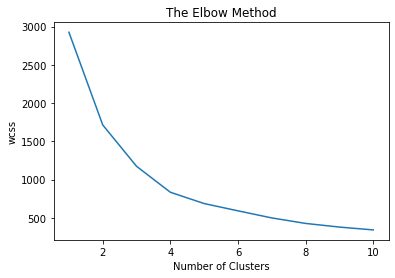

In [13]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show( )

# 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

* From the above figure, the optimum number of clusters is 4.

In [17]:
# K-Means
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)
type(X)

numpy.ndarray

In [18]:
y_kmeans

array([3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 0,
       3, 0, 0, 1, 3, 3, 0, 3, 1, 2, 3, 0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3,
       3, 0, 3, 3, 0, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       3, 0, 3, 3, 0, 1, 1, 1, 0, 3, 3, 0, 3, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 3, 3, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2])

* Thus the cluster values range from 0 to 3.

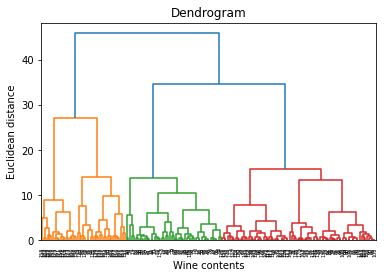

In [22]:
# Hierarchial clustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Wine contents')
plt.ylabel('Euclidean distance')
plt.show( )


In [24]:
###From the dendrogram, the optimum number of clusters is 4
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)
y_hc

array([2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 3,
       3, 3, 3, 1, 3, 3, 3, 0, 1, 0, 3, 1, 3, 3, 1, 1, 0, 3, 3, 3, 1, 3,
       3, 1], dtype=int64)

* Thus the cluster values range from 0 to 3.

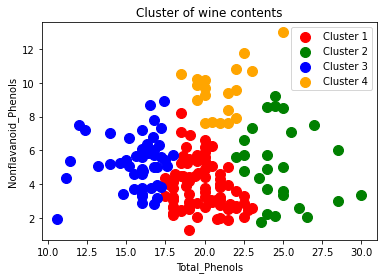

In [27]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='green',label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue',label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='orange',label='Cluster 4')
plt.title('Cluster of wine contents')
plt.xlabel('Total_Phenols')
plt.ylabel('Nonflavanoid_Phenols' )
plt.legend( )
plt.show( )